In [1]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('https://raw.githubusercontent.com/Kuntal-G/Machine-Learning/master/R-machine-learning/data/banknote-authentication.csv')

In [2]:
dataset.head()

,variance,skew,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
dataset.head()

,variance,skew,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
X = dataset.drop(['class'], axis=1).values

In [5]:
X

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [6]:
y= dataset['class'].values

In [7]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [8]:
y.shape

(1372,)

In [9]:
def define_parameters( n_weights ):
    w = np.random.randn( n_weights , 1 )
    b = np.random.randn()
    return w , b

In [10]:
b = np.random.randn()
b

0.14325291036491763

In [11]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [12]:
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

In [13]:
def predictions(w,b,X):
    XW = np.dot(X, w) + b
    z =  sigmoid(XW)
    return z

In [14]:
def find_cost(z, y):
    m = y.shape[0]
    total_cost = (1/m)*np.sum( np.square(z-y)   )
    return total_cost

In [15]:
def find_derivates(X, y, z):
    m = y.shape[0]
    dcost_dpred=(1/m)*(z-y)
    dpred_dz = sigmoid_der(z)
    z_delta = dcost_dpred*dpred_dz
    dz_dw =  X.T
    dw =  np.dot(dz_dw, z_delta)
    db =  np.sum(  z_delta )
    return dw, db

In [16]:
#gradient descendent
def update_weigths( w , b, dw , db , lr ):
    w = w - lr * dw
    b= b-lr * db
    return w , b

In [17]:
def multi_logistic_regression(X, y , lr, epoch):
    error_list=[]
    lenw = X.shape[1]
    w, b = define_parameters(lenw)
    for i in range(epoch):
        z= predictions(w, b, X)
        cost = find_cost(z, y)
        error_list.append(cost)
        dw , db = find_derivates(X,y,z)
        w,b=update_weigths(w,b,dw,db,lr)
        if i % 50 == 0:
            print(cost)
    return w,b,error_list

    

In [18]:
lr = 0.05
epoch = 2000
w, b, error_list = multi_logistic_regression(X,y,lr, epoch)

531.8141640864023
307.6847845740241
199.9374985235705
155.98724399849263
137.55426002700727
128.19861836110428
122.63443625501691
118.9928812281045
116.46825147638292
114.64787401686867
113.29476636229747
112.26308326502365
111.45898123022565
110.82006192602661
110.30368901719477
109.88001718037177
109.52769175232285
109.23112520084281
108.97873194324876
108.76175945035477
108.57349824377096
108.40873748410218
108.26338283052804
108.13418353095109
108.01853436770337
107.91432978645074
107.81985499589675
107.73370366016998
107.65471498985782
107.58192516852237
107.51452949989252
107.45185266021068
107.39332513960147
107.3384644525002
107.28686005369808
107.23816115579403
107.19206683444305
107.14831794936153
107.10669051520979
107.06699023676948


In [ ]:
print( error_list )

In [22]:
import matplotlib.pyplot as plt

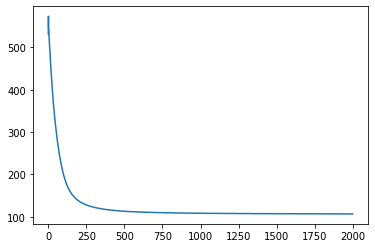

In [23]:
plt.plot(error_list)

In [24]:
z = predictions(w,b,X)

In [25]:
y_pred=[]

In [26]:
for i in z:
    if i > 5.0:
        y_pred.append(1)
    else:
        y_pred.append(0)
    y_true = sum(y.tolist(),[])
    

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()